In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings

warnings.filterwarnings(action = 'ignore')

In [5]:
sample_df = pd.read_csv('행정동_기준_동별데이터_1028.csv',index_col=0)
sample_df.shape

(426, 32)

In [6]:
sample_df

,ACADEMY_NUM,KINDER_NUM,FIRE_NUM,ELE_SCH_NUM,MID_SCH_NUM,HIGH_SCH_NUM,CCTV_NUM,POLICE_NUM,BIKE_NUM,CAR_SHR_NUM,...,STARBUCKS_NUM,MC_NUM,CON_NUM,NOISE_VIBRATION_NUM,CHILD_MED_NUM,CAFE_NUM,PARK_NUM,GU,DONG,DONG_CODE
2,18.000000,0.000000,1.0,2.000000,2.000000,3.0,56.666667,2.000000,5.666667,1.000000,...,0.333333,0.0,4.000000,18816.000000,7.333333,39.666667,1.666667,종로구,청운효자동,1111051500
12,19.000000,10.000000,0.0,2.000000,0.000000,0.0,41.666667,3.000000,11.666667,5.000000,...,7.333333,0.0,20.000000,22848.000000,10.333333,100.666667,2.666667,종로구,사직동,1111053000
24,2.000000,10.000000,0.0,0.000000,1.000000,1.0,22.000000,1.000000,7.000000,1.000000,...,1.000000,0.0,2.000000,14112.000000,1.000000,52.000000,1.000000,종로구,삼청동,1111054000
31,24.000000,0.000000,1.0,4.000000,1.000000,1.0,41.000000,1.000000,5.000000,5.000000,...,0.000000,0.0,8.000000,6048.000000,5.000000,30.000000,1.000000,종로구,부암동,1111055000
34,28.000000,0.000000,0.0,0.000000,0.000000,1.0,21.000000,1.000000,7.000000,0.000000,...,1.000000,0.0,6.000000,4032.000000,10.000000,36.000000,0.000000,종로구,평창동,1111056000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,...,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,강동구,성내2동,1174065000
763,63.333333,16.666667,1.0,1.333333,0.333333,0.0,52.000000,0.333333,6.000000,6.666667,...,1.333333,0.0,38.666667,1442.333333,4.000000,47.666667,0.000000,강동구,성내3동,1174066000
764,100.000000,20.000000,1.0,6.000000,1.000000,0.0,119.000000,0.000000,9.000000,10.000000,...,2.000000,0.0,76.000000,4327.000000,10.000000,63.000000,1.000000,강동구,길동,1174068500
765,38.000000,0.000000,0.0,2.000000,1.500000,1.0,32.500000,1.000000,5.500000,2.000000,...,0.000000,0.5,17.000000,2163.500000,0.000000,17.500000,1.000000,강동구,둔촌1동,1174069000


In [4]:
sample_df['DPTM_NUM'].describe()

count    426.000000
mean       0.063380
std        0.207678
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.500000
Name: DPTM_NUM, dtype: float64

In [36]:
sample_df.set_index('DONG_CODE',inplace=True)

In [37]:
sample_df.columns

Index(['SUBWAY_NUM', 'STARBUCKS_NUM', 'SPORT_NUM', 'SAFE_DLVR_NUM',
       'POLICE_NUM', 'PHARM_NUM', 'NOISE_VIBRATION_NUM', 'MID_SCH_NUM',
       'MC_NUM', 'LEISURE_NUM', 'KINDER_NUM', 'KIDS_NUM', 'HOSPITAL_NUM',
       'HIGH_SCH_NUM', 'GYM_NUM', 'GOLF_NUM', 'FIRE_NUM', 'ELE_SCH_NUM',
       'DPTM_NUM', 'CON_NUM', 'CHILD_MED_NUM', 'CCTV_NUM', 'CAR_SHR_NUM',
       'CAFE_NUM', 'BUS_NUM', 'BIKE_NUM', 'ANI_HSPT_NUM', 'ACADEMY_NUM', 'GU',
       'DONG', 'BUS_CNT'],
      dtype='object')

In [38]:

data = sample_df.iloc[:, :-3]
data.drop(['SPORT_NUM','CCTV_NUM','FIRE_NUM'],axis=1,inplace=True)
data.tail()

,SUBWAY_NUM,STARBUCKS_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,KINDER_NUM,...,ELE_SCH_NUM,DPTM_NUM,CON_NUM,CHILD_MED_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM
DONG_CODE,,,,,,,,,,,,,,,,,,,,,
1174065000,0.333333,1.333333,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,...,1.333333,0.0,38.666667,4.0,6.666667,47.666667,11.0,6.0,2.666667,63.333333
1174066000,0.333333,1.333333,0.666667,0.333333,12.666667,1442.333333,0.333333,0.0,1.666667,16.666667,...,1.333333,0.0,38.666667,4.0,6.666667,47.666667,11.0,6.0,2.666667,63.333333
1174068500,1.000000,2.000000,1.000000,0.000000,35.000000,4327.000000,1.000000,0.0,3.000000,20.000000,...,6.000000,0.0,76.000000,10.0,10.000000,63.000000,22.0,9.0,8.000000,100.000000
1174069000,0.500000,0.000000,0.000000,1.000000,10.000000,2163.500000,1.500000,0.5,0.000000,0.000000,...,2.000000,0.0,17.000000,0.0,2.000000,17.500000,7.0,5.5,1.500000,38.000000
1174070000,0.500000,0.000000,0.000000,1.000000,10.000000,2163.500000,1.500000,0.5,0.000000,0.000000,...,2.000000,0.0,17.000000,0.0,2.000000,17.500000,7.0,5.5,1.500000,38.000000


In [39]:
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0)
kmeans.fit(data)

KMeans(n_clusters=3, random_state=0)

In [40]:
basic_df = sample_df.copy()
basic_df['km_cluster'] = kmeans.labels_
basic_df.groupby('km_cluster').count()

,SUBWAY_NUM,STARBUCKS_NUM,SPORT_NUM,SAFE_DLVR_NUM,POLICE_NUM,PHARM_NUM,NOISE_VIBRATION_NUM,MID_SCH_NUM,MC_NUM,LEISURE_NUM,...,CCTV_NUM,CAR_SHR_NUM,CAFE_NUM,BUS_NUM,BIKE_NUM,ANI_HSPT_NUM,ACADEMY_NUM,GU,DONG,BUS_CNT
km_cluster,,,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
1,386,386,386,386,386,386,386,386,386,386,...,386,386,386,386,386,386,386,386,386,386
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [41]:
from sklearn.decomposition import PCA

basic_pca = PCA(n_components=2)
basic_pca_transformed = basic_pca.fit_transform(data)

basic_df['pca_x']=basic_pca_transformed[:,0]
basic_df['pca_y']=basic_pca_transformed[:,1]

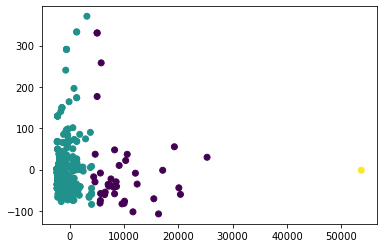

In [42]:
#  plt.xlim(-0.01,0.06)
# plt.ylim(-0.05,0.05)
plt.scatter(x=basic_df.loc[:,'pca_x'], y=basic_df.loc[:,'pca_y'],c=basic_df['km_cluster'])

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(data, basic_df['km_cluster'])
print('기본 데이터 셋 Silhouette Score:{0:.3f}'.format(score))

기본 데이터 셋 Silhouette Score:0.824
